<a href="https://colab.research.google.com/github/hiba-moideen1/thesis/blob/main/Copy_of_Thesis_Dysgraphia_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting dysgrahia from handwritten character dataset using Convolutional Neural Nets and Transfer Learning**

---
This research proposes to develop an automated system for detecting dysgraphia in children through image processing using deep learning techniques. Dysgraphia, a neurological condition affecting writing coherence, often goes undiagnosed, impacting education. With no current medications, the proposed system employs CNN architectures and transfer learning for efficient screening. The study aims to examine the results of these techniques, addressing the need for early detection and intervention in children with dysgraphia.


---










***Table of contents***


> [Import Necessary Packages](#1)

> [Exploratory Data Analysis](#2)

> [Convolutional Neural Networks](#3)

> [EfficientNet - Transfer Learning Framework](#4)

> [Conclusion of the study](#5)











### **Import Necessary Packages and Dataset**<a name="1"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

In [2]:
!pip install opencv-python

In [3]:
!pip install graphviz

In [4]:
!pip install tensorflow

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Flatten , MaxPooling2D , Dense , Dropout , GlobalAveragePooling2D
from tensorflow.keras import losses , optimizers
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import pickle
import cv2
# System libraries
from pathlib import Path
import PIL
from PIL import UnidentifiedImageError
import os.path
import tkinter

In [6]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [7]:
!unzip 'gdrive/MyDrive/Colab Notebooks/prj/Dataset_dysgraphia.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1266.4IOwg.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1267.sgNiH.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1268.okrK0.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1269.WGV1I.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1270.AAguI.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1271.acDMI.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1272.9422e.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1273.9WXvR.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1274.xyaXZ.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1275.Dw004.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Trai

### **Exploratory Data Analysis**<a name="2"></a>


**Assigning Path variables for train and test folders in the dataset**

In [8]:
dataTrain = Path("/content/Dataset Dyslexia_Password WanAsy321/Gambo/Train")

In [9]:
dataTest = Path("/content/Dataset Dyslexia_Password WanAsy321/Gambo/Test")

**Storing filepaths and labels in lists and concatenate them to respective dataframes.**

In [10]:
filepath = list(dataTrain.glob(r"**/*.png"))
filepath_test = list(dataTest.glob(r"**/*.png"))

In [11]:
print(filepath[20])

/content/Dataset Dyslexia_Password WanAsy321/Gambo/Train/Corrected/9_4938.png


In [12]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))
labels_test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath_test))

filepath = pd.Series(filepath, name='Filepath').astype(str)
filepath_test = pd.Series(filepath_test, name='Filepath').astype(str)
print(labels_test[30000])

Reversal


In [13]:
labels = pd.Series(labels,name="Labels")
labels_test = pd.Series(labels_test,name="Labels")

The dataset is divided into two folders: Train and Test, with each containing three folders that will act as image classes in our research. The dataset is obtained from public sources and was collated for a different study. The correctly shaped characters are classified under "Normal" handwriting while the wrong alphabet shape and corrected is classified under "Corrected" handwriting. The "Normal" handwriting is flipped for characters which change shape when doing so, to create the "Reversal" handwriting.

**Exploring training dataset**

In [14]:
TrainData = pd.concat([filepath,labels],axis=1)
TrainData

,Filepath,Labels
0,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
1,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
2,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
3,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
4,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
...,...,...
151644,/content/Dataset Dyslexia_Password WanAsy321/G...,Normal
151645,/content/Dataset Dyslexia_Password WanAsy321/G...,Normal
151646,/content/Dataset Dyslexia_Password WanAsy321/G...,Normal
151647,/content/Dataset Dyslexia_Password WanAsy321/G...,Normal


In [15]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151649 entries, 0 to 151648
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Filepath  151649 non-null  object
 1   Labels    151649 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [30]:
TrainData.shape

(151649, 2)

In [16]:
TrainData['Labels'].unique()

array(['Corrected', 'Reversal', 'Normal'], dtype=object)

In [17]:
print(TrainData["Labels"].value_counts())

Corrected    65534
Reversal     46781
Normal       39334
Name: Labels, dtype: int64


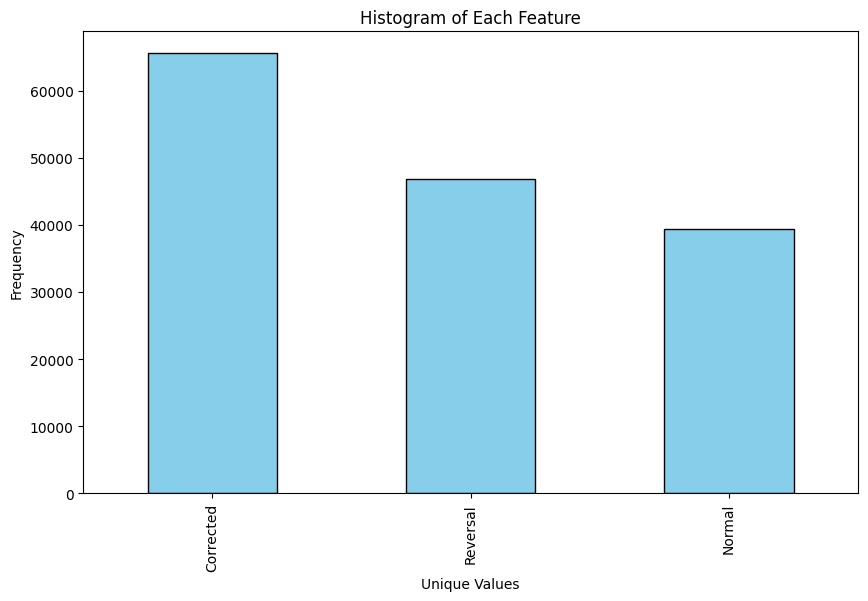

In [18]:
# Plot histogram for each column
value_counts = TrainData['Labels'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Histogram of Each Feature')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.show()

We can observe that in the training dataset, there is an imbalance between the class with the most features and the class with the least features. The "Corrected" class has about 20000 images representing the class more than "Normal" class. We may consider Oversampling techniques if required.

**Exploring test dataset**

In [15]:
TestData = pd.concat([filepath_test,labels_test],axis=1)
TestData

,Filepath,Labels
0,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
1,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
2,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
3,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
4,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
...,...,...
56718,/content/Dataset Dyslexia_Password WanAsy321/G...,Normal
56719,/content/Dataset Dyslexia_Password WanAsy321/G...,Normal
56720,/content/Dataset Dyslexia_Password WanAsy321/G...,Normal
56721,/content/Dataset Dyslexia_Password WanAsy321/G...,Normal


In [20]:
TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56723 entries, 0 to 56722
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  56723 non-null  object
 1   Labels    56723 non-null  object
dtypes: object(2)
memory usage: 886.4+ KB


In [29]:
TestData.shape

(56723, 2)

In [21]:
TestData['Labels'].unique()

array(['Corrected', 'Reversal', 'Normal'], dtype=object)

In [22]:
print(TestData["Labels"].value_counts())

Normal       19557
Corrected    19284
Reversal     17882
Name: Labels, dtype: int64


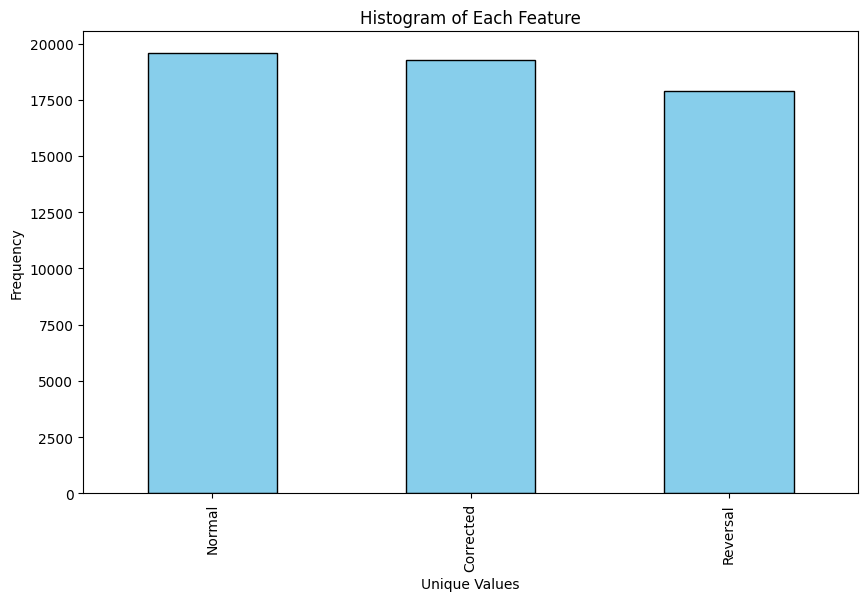

In [23]:
# Plot histogram for each column
value_counts = TestData['Labels'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Histogram of Each Feature')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.show()

The classes are quite balanced with 19557 "Normal", 19284 "Corrected" and 17882 "Reversal" features.


**Display pictures from the dataset randomly**

In [24]:
AugPath = Path("Train").rglob("*.png")
for imageP in AugPath:
    try:
        img = PIL.Image.open(imageP)
    except PIL.UnidentifiedImageError:
        print(imageP)

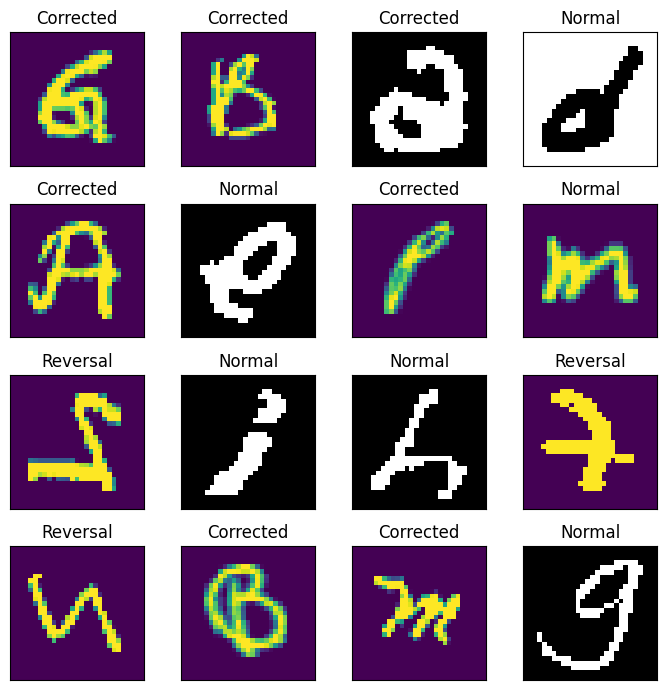

In [25]:
# Display 20 picture of the dataset with their labels
random_index = np.random.randint(0 , len(TrainData) , 20)
fig,axes = plt.subplots(nrows=4 , ncols=4 , figsize=(7,7) , subplot_kw={'xticks': [], 'yticks': []} )

for i , ax in enumerate(axes.flat):
    ax.imshow(plt.imread(TrainData.Filepath[random_index[i]]))
    ax.set_title(TrainData.Labels[random_index[i]])
plt.tight_layout()
plt.show()

### **Convolutional Neural Networks**<a name="3"></a>

A **Convolutional Neural Network** (CNN) is an artificial neural network that is especially intended to interpret structured grid data like photos and videos. CNNs are highly successful for computer vision applications such as image recognition, object identification, and picture categorization. They have proven to be extremely effective in a variety of applications because to their capacity to automatically learn hierarchical representations of visual input.

Key components of a Convolutional Neural Network are:

1. **Convolutional Layers:** - CNNs employ convolutional layers to apply convolutions to input data. These convolutions apply a collection of filters (also known as kernels) to the input picture. Each filter pulls distinct characteristics from the input data, such as edges, textures, or more complicated patterns.

2. **Pooling (sub- or down-sampling) Layers:** Pooling layers are frequently employed following convolutional procedures to minimise the spatial dimensionality of the data. Max pooling, for example, keeps the most important information from a collection of pixels, hence lowering the size of the feature maps.

3. **Activation Functions:** - These functions add non-linearity to the network, enabling it to understand complicated patterns and correlations in data. In CNNs, common activation functions include Rectified Linear Unit (ReLU) for hidden layers, which substitutes negative values with zero, and softmax for the output layer in multi-class classification applications.

4. **Fully Connected Layers:** - These layers establish dense connections by connecting all neurons from one layer to the next. These layers are normally located at the conclusion of the network and are in charge of producing final predictions based on the learnt characteristics.

5. **Flattening:** - Convolutional and pooling feature maps are flattened into a one-dimensional vector before passing to fully linked layers for processing. This transformation allows the input to be handled using typical fully linked layers.

CNNs are trained via backpropagation and optimisation algorithms, which alter the network's weights and biases to reduce the disparity between expected and actual outputs.


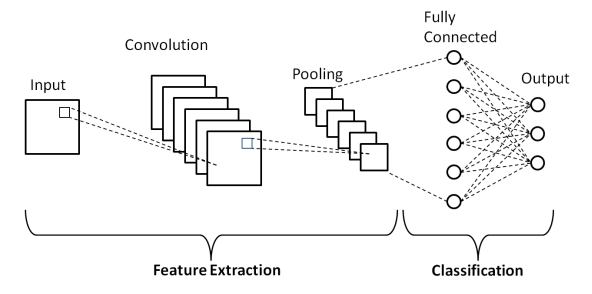










**Data Preprocessing**

ImageDataGenerator is a utility class in the Keras deep learning library, which is often used in the context of Convolutional Neural Networks (CNNs) for image data.

The ImageDataGenerator is configured with various augmentation parameters, and then it is used to generate augmented images on-the-fly from a single input image. These augmented images can be used during the training process to improve the model's performance.

In [16]:
datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_image = datagen.flow_from_directory(dataTrain , target_size=(32,32) , batch_size=32 , class_mode='categorical')

Found 151649 images belonging to 3 classes.


In [18]:
test_image = datagen.flow_from_directory(dataTest , target_size=(32,32) , batch_size=32 , class_mode='categorical')

Found 56723 images belonging to 3 classes.


In [20]:
train_image

**Model Building**

The model consists of a stack of convolutional layers with max-pooling, followed by dropout for regularization, and finally, fully connected dense layers for classification. The architecture is designed for image classification tasks on 32x32 pixel images with three classes.

In [21]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

Using plot_model() function to plot and visualize the network.

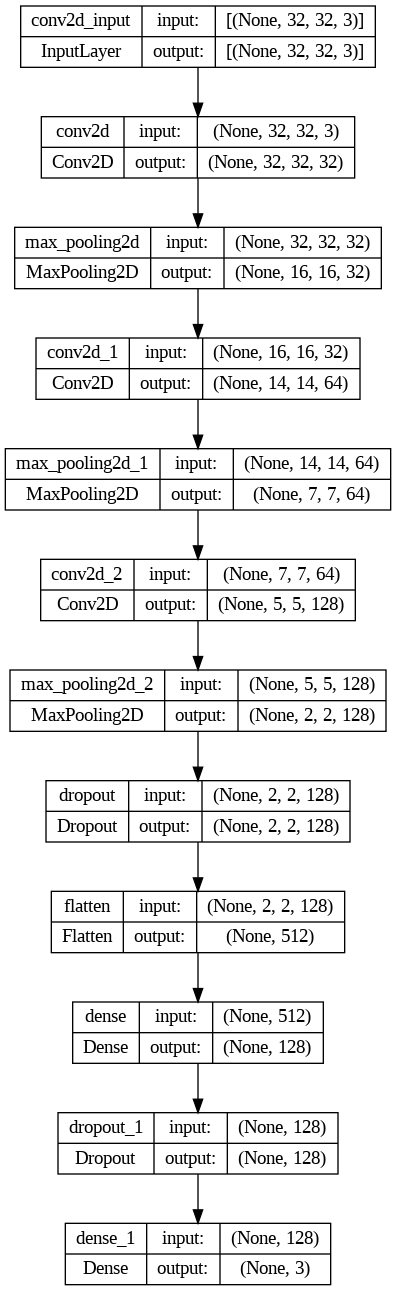

In [28]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

A sequential model is initialized, meaning that the layers will be added sequentially in the order they are defined.

The first layer is a 2D convolutional layer (Conv2D) with 32 filters, each of size (3, 3). The "padding" parameter is set to "same," meaning the spatial dimensions of the output feature map will be the same as the input. The activation function used is Rectified Linear Unit (ReLU). The input_shape parameter specifies the shape of the input data, which is a 32x32 pixel image with three color channels (RGB).

A max-pooling layer follows the first convolutional layer. Max-pooling reduces the spatial dimensions of the feature map by taking the maximum value within each pooling window. Here, a pooling window of size (2, 2) is used.

The second convolutional layer has 64 filters with a size of (3, 3). Another max-pooling layer follows with a pool size of (2, 2).

Similarly, a third convolutional layer is added with 128 filters and a size of (3, 3), followed by another max-pooling layer.

A dropout layer is included to help prevent overfitting. It randomly sets a fraction (here, 25%) of input units to zero during training.

The model then flattens the output from the previous layer into a one-dimensional vector, preparing it for fully connected layers.

A fully connected dense layer with 128 neurons and ReLU activation follows the flattening layer.

Another dropout layer with a lower dropout rate (20%) is added for further regularization.

The final dense layer has three neurons, corresponding to the three classes in the classification task. The activation function used is softmax, which is suitable for multi-class classification problems. This layer produces the final output probabilities for each class.

In [ ]:
model.compile(loss='categorical_crossentropy' , optimizer=optimizers.Adam() , metrics=['accuracy'] )

In [ ]:
!pip install keras --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


In [ ]:
history = model.fit(train_image, epochs=30, batch_size=28,  validation_data = test_image,  verbose=1)
# CNNhistory = model.fit(train_image , steps_per_epoch=len(train_image) , validation_data= test_image , validation_steps=len(test_image) , epochs=10)
# save the model
pickle.dump(model, open('CNNModel.pkl', 'wb'))

Epoch 1/30
4740/4740 [==============================] - 95s 19ms/step - loss: 0.1994 - accuracy: 0.9248 - val_loss: 0.3396 - val_accuracy: 0.8877
Epoch 2/30
4740/4740 [==============================] - 85s 18ms/step - loss: 0.0816 - accuracy: 0.9706 - val_loss: 0.3687 - val_accuracy: 0.8892
Epoch 3/30
4740/4740 [==============================] - 85s 18ms/step - loss: 0.0571 - accuracy: 0.9797 - val_loss: 0.5495 - val_accuracy: 0.8852
Epoch 4/30
4740/4740 [==============================] - 84s 18ms/step - loss: 0.0459 - accuracy: 0.9842 - val_loss: 0.4600 - val_accuracy: 0.8824
Epoch 5/30
4740/4740 [==============================] - 85s 18ms/step - loss: 0.0382 - accuracy: 0.9871 - val_loss: 0.5484 - val_accuracy: 0.8855
Epoch 6/30
4740/4740 [==============================] - 85s 18ms/step - loss: 0.0349 - accuracy: 0.9880 - val_loss: 0.5178 - val_accuracy: 0.8859
Epoch 7/30
4740/4740 [==============================] - 86s 18ms/step - loss: 0.0318 - accuracy: 0.9892 - val_loss: 0.5617 -

**Evaluation and Saving the model**

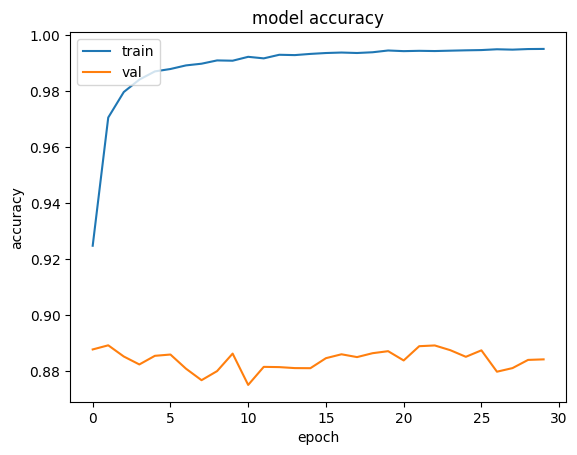

In [ ]:
# Plot Accuracy and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

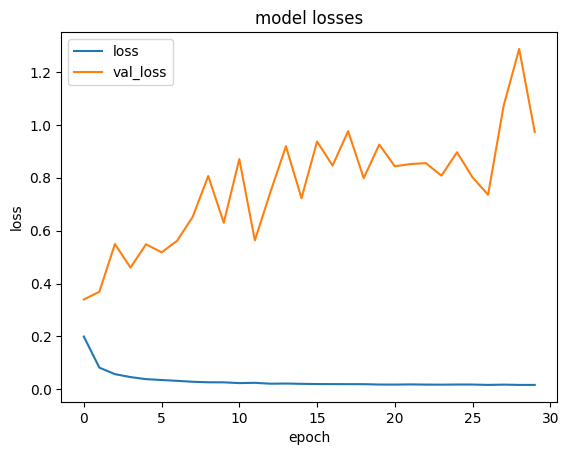

In [ ]:
# Plot loss and val_loss accuarcy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model losses')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [ ]:
# to save model
keras.models.save_model(model , 'saved_cnn_model')

In [ ]:
# Load model
CNNModel = keras.models.load_model('saved_cnn_model')

**Predicting by uploading and detecting on random character images**

In [ ]:
#Uploading a random normal handwritten character for prediction
path=["/content/A-41.png","/content/A-42.png","/content/4_1.png"] # 2 reversal and 1 corrected

In [ ]:
def TestInput(CNNModelSaved , imgMatrix):
    labels=["0 - Normal","1 - Reversal","2 - Corrected"]
    imgMatrix = cv2.resize(imgMatrix , (32,32))
    imgMatrix = imgMatrix.astype('float32')
    imgMatrix /= 255.0
    imgMatrix = cv2.cvtColor(imgMatrix, cv2.COLOR_BGR2RGB)
    imgMatrix = imgMatrix.reshape((1, 32, 32, 3))
    c = CNNModelSaved.predict(imgMatrix)
    p = np.argmax(c)
    return labels[p]

In [ ]:
i=0
for x in path:
  img = plt.imread(path[i])
  PredictValue = TestInput(CNNModel , img)
  print(PredictValue)
  i=i+1

1/1 [==============================] - 0s 28ms/step
0 - Normal
1/1 [==============================] - 0s 17ms/step
0 - Normal
1/1 [==============================] - 0s 16ms/step
0 - Normal


We can observe that there are 2 out of 3 wrong observations. There could be overfitting in the model even after regularization and data augmentation.

### **Transfer Learning - EfficientNet**<a name="4"></a>

EfficientNet is a series of convolutional neural network designs that aim to achieve great performance with fewer parameters than other prominent architectures such as ResNet and Inception. Mingxing Tan and Quoc V. Le presented it in their paper, "EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks."

The main idea underlying EfficientNet is to strike a compromise between model size (the number of parameters) and model performance. Traditional ways to scaling neural networks include concurrently increasing both width and depth, resulting in a quadratic rise in computing cost. EfficientNet presents a compound scaling approach that uniformly adjusts the network's depth, width, and resolution using a given set of scaling factors. This methodology outperforms manual scaling approaches.


**Data Preprocessing**

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # validation_split=0.2  # Adjust validation split as needed
)

train_generator = train_datagen.flow_from_directory(
    '/content/Dataset Dyslexia_Password WanAsy321/Gambo/Train',
    target_size=(224, 224),  # Adjust based on EfficientNet model input size
    batch_size=32,
    class_mode='categorical',
    # subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/Dataset Dyslexia_Password WanAsy321/Gambo/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    # subset='validation'
)

Found 151649 images belonging to 3 classes.
Found 56723 images belonging to 3 classes.


**Model Building**

In [30]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import EfficientNetB0, EfficientNetB1
from keras import layers, models

base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


16705208/16705208 [==============================] - 0s 0us/step


In [31]:
ef_model = models.Sequential()
ef_model.add(base_model)
ef_model.add(layers.GlobalAveragePooling2D())
ef_model.add(layers.BatchNormalization())
ef_model.add(layers.Dense(256, activation='relu'))
ef_model.add(layers.BatchNormalization())
ef_model.add(layers.Dropout(0.5))
ef_model.add(layers.BatchNormalization())
ef_model.add(layers.Dense(3, activation='softmax'))  # 3 classes


The ef_model is a Sequential model that takes advantage of the EfficientNet architecture as a base, followed by global average pooling, batch normalization, dense layers, and dropout for regularization. The model is designed for a classification task with three classes. The use of batch normalization and dropout contributes to better training stability and generalization.

Using plot_model() function to plot and visualize the network.

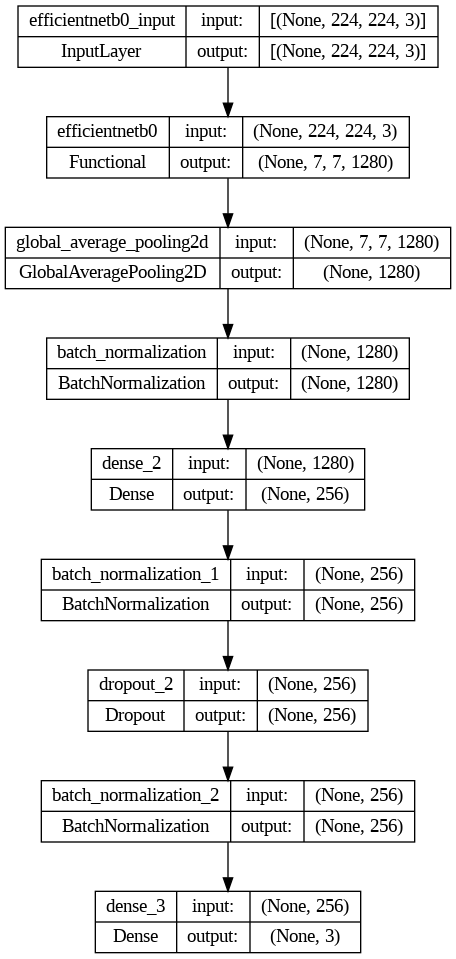

In [32]:
from keras.utils import plot_model
plot_model(ef_model, to_file='efmodel_plot.png', show_shapes=True, show_layer_names=True)

A sequential model is initialized. Add the **EfficientNet architecture** (stored in the variable base_model) as the first layer of the sequential model. This means that the output of base_model will be the input to the subsequent layers.

Add a Global Average Pooling 2D layer. This layer reduces the spatial dimensions of the data by taking the average value over the entire spatial extent of each feature map. It helps in reducing the number of parameters and providing a more compact representation.

Add a Batch Normalization layer. Batch Normalization normalizes the input of a layer by adjusting and scaling the activations, which can lead to more stable and faster training.

Add a Dense (fully connected) layer with 256 neurons and ReLU activation function. This layer is responsible for learning higher-level features from the pooled and normalized features.

Add another Batch Normalization layer for normalization.

Add a Dropout layer with a dropout rate of 0.5. Dropout helps prevent overfitting by randomly setting a fraction of input units to zero during training.

Followed up by a normalization layer.

Finally, add a Dense layer with 3 neurons and softmax activation function. This layer produces the final output, providing probabilities for each class in a multi-class classification task.

In [ ]:
ef_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
ef_history = ef_model.fit(train_generator, epochs=10, batch_size=28,  validation_data = validation_generator,  verbose=1, callbacks=early_stopping)
# save the model
pickle.dump(ef_model, open('EFModel.pkl', 'wb'))

Epoch 1/10


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7b3a7787f370>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7b3a7787f370>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4740/4740 [==============================] - ETA: 0s - loss: 0.3303 - accuracy: 0.8407

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7b3a6e1ec430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7b3a6e1ec430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4740/4740 [==============================] - 3043s 633ms/step - loss: 0.3303 - accuracy: 0.8407 - val_loss: 3.5889 - val_accuracy: 0.3448
Epoch 2/10
4740/4740 [==============================] - 2982s 629ms/step - loss: 0.2238 - accuracy: 0.8802 - val_loss: 3.1363 - val_accuracy: 0.3407
Epoch 3/10
4740/4740 [==============================] - 3005s 634ms/step - loss: 0.2035 - accuracy: 0.8887 - val_loss: 1.0401 - val_accuracy: 0.5210
Epoch 4/

**Evaluation using the trained model**

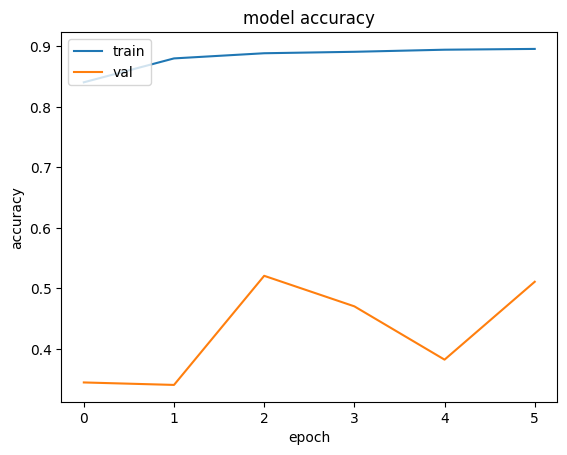

In [ ]:
# Plot Accuracy and validation accuarcy
plt.plot(ef_history.history['accuracy'])
plt.plot(ef_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The disparity between training and test acuuracies, 89% and 51% respectively, suggest high levels of overfitting on the training dataset for our model. It is therefore important to work on fine tuning our model by tuning our hyperparameters.

**Fine Tuning the Model**

Focus areas:

*   trainable layers in the pretrained model
*   data augmentation
*   increasing the number of layers
*   L2 regularization
*   batch normalization
*   learning rate scheduler











**Data Preprocessing**

In [33]:
base_model1 = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in base_model.layers[-20:]:
    layer.trainable = True

When layers.trainable is set to True, it means that the parameters (weights and biases) of the specified layers are trainable during the training process. These layers will be updated through backpropagation, and their weights will be adjusted in order to minimize the loss function during training.

The last 20 layers of the pre-trained EfficientNetB0 model are set to be trainable, allowing them to be fine-tuned for a specific task. The rest of the layers in the base model remain frozen. The new layers added on top of the base model will also be trainable.

In [34]:
#data sugmentation and splitting train dataset to train and validation
ef1train_datagen = ImageDataGenerator(
    rescale=1./255,
    # shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    horizontal_flip=False,
    # validation_split=0.2  # Adjust validation split as needed
)

ef1train_generator = ef1train_datagen.flow_from_directory(
    '/content/Dataset Dyslexia_Password WanAsy321/Gambo/Train',
    target_size=(224, 224),  # Adjust based on EfficientNet model input size
    batch_size=32,
    class_mode='categorical',
    # subset='training'
)

ef1validation_generator = ef1train_datagen.flow_from_directory(
    '/content/Dataset Dyslexia_Password WanAsy321/Gambo/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    # subset='validation'
)


Found 151649 images belonging to 3 classes.
Found 56723 images belonging to 3 classes.


**Model Building**

In [35]:
from tensorflow.keras import regularizers #Incorporate L2 regularization in your dense layers to penalize large weights.

ef1_model = models.Sequential()
ef1_model.add(base_model1)
ef1_model.add(layers.GlobalAveragePooling2D())
ef1_model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
ef1_model.add(layers.Dense(128, activation='relu'))# added additional dense layer
ef1_model.add(layers.BatchNormalization())
ef1_model.add(layers.Dense(64, activation='relu'))# added additional dense layer
ef1_model.add(layers.Dropout(0.5))
ef1_model.add(layers.Dense(3, activation='softmax'))  # 3 classes, adjust based on your specific case

This modified EfficientNet model incorporates L2 regularization in the first dense layer, adds an extra dense layer for feature learning, and includes Batch Normalization and Dropout for improved training stability and regularization. The model is designed for a classification task with three classes.

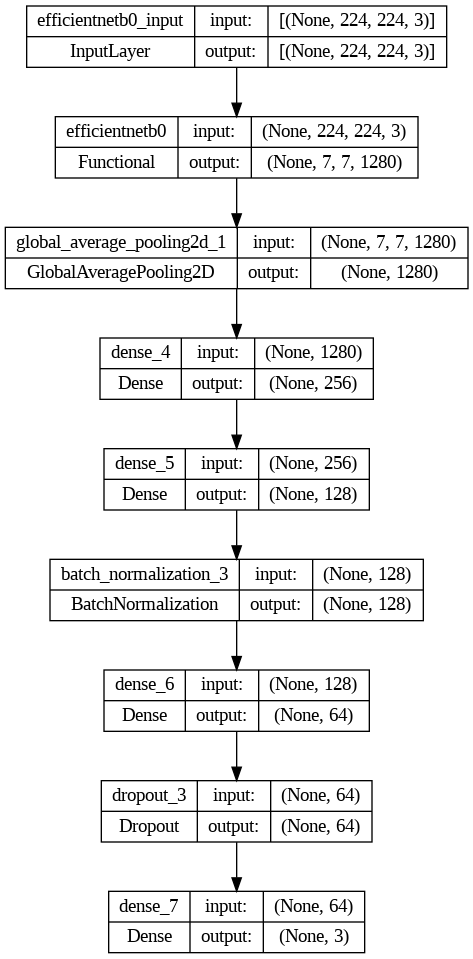

In [36]:
from keras.utils import plot_model
plot_model(ef1_model, to_file='ef1model_plot.png', show_shapes=True, show_layer_names=True)

A sequential model is initialized. Add the base model (stored in the variable base_model1) as the first layer of the sequential model. This is typically a pre-trained EfficientNet model that captures complex features.

Add a Global Average Pooling 2D layer to reduce spatial dimensions and obtain a more compact representation of the features.

Add a Dense (fully connected) layer with 256 neurons and ReLU activation function. Additionally, apply L2 regularization to the weights of this layer using kernel_regularizer. L2 regularization helps prevent overfitting by penalizing large weights.

Add an additional Dense layer with 128 neurons and ReLU activation. This introduces another layer for learning hierarchical features.

Add a Batch Normalization layer for normalizing the activations and improving training stability.

Add another Dense layer with 64 neurons and ReLU activation. This provides further capacity for feature learning.

Add a Dropout layer with a dropout rate of 0.5. Dropout helps prevent overfitting by randomly setting a fraction of input units to zero during training.

Finally, add a Dense layer with 3 neurons and softmax activation for the classification task with three classes.

In [ ]:
#learning rate scheduler
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        return lr * 0.9
    return lr

opt = Adam(learning_rate=0.0001)
lr_schedule = LearningRateScheduler(lr_scheduler)

ef1_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

This function takes two arguments: epoch and the current learning rate lr. The scheduler reduces the learning rate by a factor of 0.9 every 10 epochs, starting from the 10th epoch. The purpose of reducing the learning rate periodically is often to fine-tune the model as training progresses, allowing for more precise convergence and potentially avoiding overshooting the optimal weights.

In [ ]:
#Compiling the model
ef1_history = ef1_model.fit(ef1train_generator,  batch_size=32, epochs=5,  validation_data = ef1validation_generator,  verbose=1, callbacks=early_stopping)
# save the model
pickle.dump(ef1_history, open('EF1Model.pkl', 'wb'))

Epoch 1/5
4740/4740 [==============================] - 3058s 625ms/step - loss: 0.3794 - accuracy: 0.9899 - val_loss: 0.4212 - val_accuracy: 0.9135
Epoch 2/5
4740/4740 [==============================] - 2927s 618ms/step - loss: 0.0242 - accuracy: 0.9941 - val_loss: 0.3997 - val_accuracy: 0.9011
Epoch 3/5
4740/4740 [==============================] - 2918s 615ms/step - loss: 0.0189 - accuracy: 0.9951 - val_loss: 0.5079 - val_accuracy: 0.8809
Epoch 4/5
4740/4740 [==============================] - 2918s 616ms/step - loss: 0.0168 - accuracy: 0.9956 - val_loss: 0.3909 - val_accuracy: 0.8933
Epoch 5/5
4740/4740 [==============================] - 2900s 612ms/step - loss: 0.0141 - accuracy: 0.9961 - val_loss: 0.4854 - val_accuracy: 0.9154


In [ ]:
# to save model
keras.models.save_model(ef1_model , 'saved_ef_model')

**Evaluation**

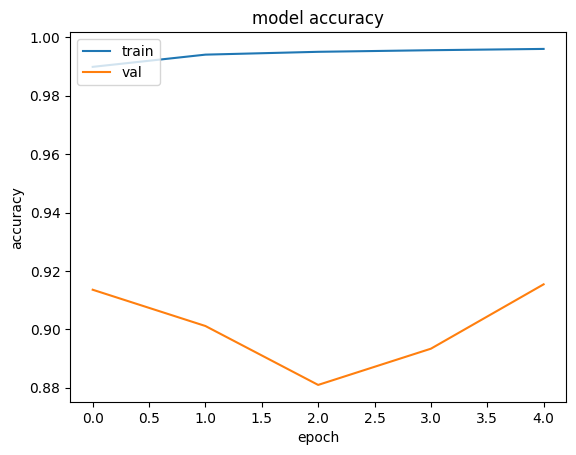

In [ ]:
# Plot Accuracy and validation accuarcy
plt.plot(ef1_history.history['accuracy'])
plt.plot(ef1_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

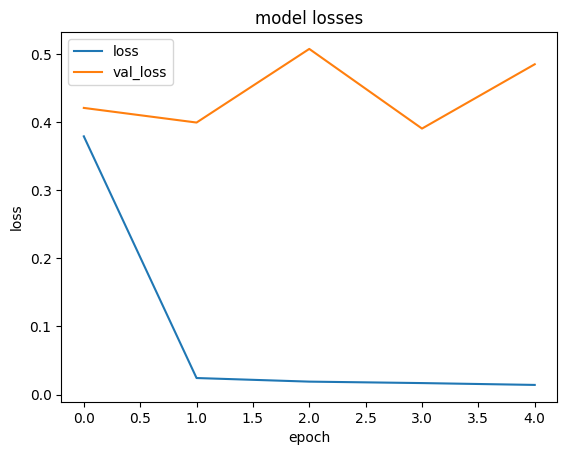

In [ ]:
# Plot loss and val_loss accuarcy
plt.plot(ef1_history.history['loss'])
plt.plot(ef1_history.history['val_loss'])
plt.title('model losses')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

The model is able to achieve a training loss: 0.0141 - training accuracy: 0.9961 - validation loss: 0.4854 - validation accuracy: 0.9154. Accuracy of 99.61% in Training and 91.54% in Validation is an exemplary learning model for the detection of dysgraphia from handwritten character images data.

In [ ]:
# Load model
EFModel = keras.models.load_model('saved_ef_model')

**Prediction using images of handwritten characters**

In [ ]:
from tensorflow.keras.preprocessing import image

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values to [0, 1]
    return img_array

# Example: Load three random images
image_paths = ['/content/1_1.png', '/content/4_1.png', '/content/A-42.png']

test_images = [preprocess_image(img_path) for img_path in image_paths]
test_images = np.vstack(test_images)

In [ ]:
predictions = EFModel.predict(test_images)

# Assuming you have three classes, get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted Labels:", predicted_labels)

1/1 [==============================] - 3s 3s/step
Predicted Labels: [2 0 1]


The model is able to successfully in the order - 2 for "Reversal", 0 for "Corrected" and "Normal"

In [ ]:
# Saving the model for Future Inferences

model_json = ef1_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [ ]:
# Saving Trained Models With h5py. Once the model is prepared with the trained weights, we're ready to use it for inference.

from keras.models import model_from_json

# opening and store file in a variable

json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = model_from_json(loaded_model_json)
print("Loaded Model Summary:")
loaded_model.summary()
# load weights into new model

loaded_model.load_weights("model.h5", by_name = True, skip_mismatch = True)
print("Loaded Model from disk")

# compile and evaluate loaded model

loaded_model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

Loaded Model Summary:
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_6  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_22 (Dense)            (None, 256)               327936    
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_11 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                